<center>Computational Statistics, Prof. Dr. Lena Janys | Bonn University | Date: 23.08.2022  <br> 
        Luis Enrique Kaiser, Matriculation Number: 3082519</center> 


    
# <center>Final project: Tree-based ensemble methods for classification</center>
## <center> Evaluating prediction performance of tree-based ensemble methods for altered training data</center>


In [18]:
library(ggplot2)
library("IRdisplay")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Description-of-the-methods" data-toc-modified-id="2.-Description-of-the-methods-2">2. Description of the methods</a></span><li><span><a href="#3.-Data-generating-process" data-toc-modified-id="3.-Data Generating Proces-3">3. Data generating process</a></span></li><li><span><a href="#4.-Simulations" data-toc-modified-id="4.-Simulations-4">4.Simulations </a></span></li><li><span><a href="#5.-Empirical-application" data-toc-modified-id="5.-Empirical-Application-5">5. Empirical application</a></span></li>  <li><span><a href="#6.-References" data-toc-modified-id="6.-References-7">6. References</a></span>


---
## 1. Introduction
---
The data generating process is designed to closely resemble the Pima Indian diabetes dataset, which is widely used for method evaluation. Often genetic algorithms (Pekel & Özcan 2020) are used to improve prediction performance, but rarely ensemble methods are considered for this dataset, which lead me to the selection of the most popular tree-based ensemble methods.

The simulation study consists of two parts: In the first part, I replicate Breimans (2001) idea to manually misclassify a certain percentage of the training dataset. In the second part, the information content of the training dataset is altered by truncating the latent variable around the cutoff value.

---
## 2. Description of the methods
---

### Why use ensemble methods for classification trees (Dietterich, 2000)

Boosting, bagging, and random forests algorithms are ensemble methods. These methods combine a finite number of individual models by using some form of averaging over individual predictions. <br>
Ensemble methods are used to address certain shortcomings of baseline methods: 

- The first problem arises in the absence of enough data and a big space of hypothesis. Accurate classifying methods may benefit from averaging. 
- Ensemble methods can address the computational problem as well. Building the best classification tree is known to be NP-complete. (Laurent, Rivest 1976) The greedy algorithm used in CART models does not generally provide the global optimal tree but rather a heuristic, a local optimum. Dietterich points out the potential to average over many local optima. For decision trees as a base algorithm, this might be the most obvious argument.
- The third problem described by Dietterich is representation. Some possible classes might not be in the domain of possible classes chosen by the classifying algorithms. On the binary class in this study, this problem might be more subtle, since only two classes are possible and in almost all cases a decision tree will represent both of them. 

Dietterich classifies ensemble methods by the methods they use: Both bagging and boosting algorithms perform ensemble construction by manipulating training examples. Random forests use manipulation of training set as well as injection of randomness through restricting the set of possible predictors in each decision node.

### Random forests for classification (Breimann 2001)

#### Description
First introduced by Ho (1995) and extended by Breimann (2001), the framework of random forests builds on a Classification and Regression Tree (CART). <br>
The versatile method is widely used, mostly due to its good out-of-the-box performance and the little number of tuning parameters. (Biau, 2016)
As an ensemble method, it resembles bagging algorithms in general structure. Some researchers also point out the structural connection to potential nearest neighbor algorithms. (Lin, Jeon, 2006)<br>
            
The algorithm resembles in structure a bootstrap aggregation for classification and decision trees: <br>
Build independent and large decision trees on data bootstrapped from the original data. 
To make predictions, take some form of aggregated, weighted result of all individual trees. <br>
For classification cases, typically a majority voting is used. The random forest approach extends this framework by one step during the built-up of the trees: At each decision node, take $m$ random features out of all $p$ possible predictors to build the next branch. If $m=p$ the random forest approach equals a bagging algorithm.
<br><br>
Equivalent to the Hastie, Tibshirani and Friedman (2009) and the lecture notes define
 

$$R_1(j,s) = \{ X| X_j < s\} \text{ and } R_2(j,s) = \{X|X_j \geq s\}$$

as two distinct half-planes, for any $j \in \{1,..,p\}$, where $s$ is the cutoff value for the $j$'th predictor. In a regression tree context, predictor and cutoff value are decided on by minimizing the RSS. 
The equivalent for classification problems, the misclassification error is not the most suitable metric for extremum calculations, because it is not differentiable. There are different metrics to quantify the node impurity. I stick with the gini index, the most common used one, which is also used in the simulation part. 

Define
$$\hat{p}_{m k} = \frac{1}{N_m}\sum_{x_i \in R_m} I(y_i = k)$$
as the proportion of class k (in our case "Yes" or "No") in a node m. <br>


For a given node the gini index can be calculated as
            $$G(j,s) =   \sum_{k \neq k'} \hat{p}_{mk} \hat{p}_{mk'} = \sum_{k=1}^{K} \hat{p}_{mk} (1-\hat{p}_{mk})$$
The objective is to choose $(j,s)$ to minimize the sum of weighted gini indices for each node.
        
 
> For random forests, at each decision node the set of possible predictors is a random subset $M \subset\{1,...,p\}$ with $|M| = m$. The number m is held constant for all individual trees and is one main tuning parameter.

Averaging over a set of individual classifiers, built on bootstrapped data, does not change the bias of the resulting predictor, but can potentially improve the variance of predictions. Since the improvement in variance is bounded by the correlation between every single predictor, Breiman describes his method as an attempt to minimize the inter-tree correlation. 
            
#### Decorrelation, bias and variance
The random forest algorithm is difficult to analyze theoretically due to its two structural ingredients. (Biau, 2016)
The objective of random forests is to minimize the correlation between individual trees, while maintaining the strength of every single tree in predicting potential outcomes. The aim of this method stems from its origin as an improvement attempt over bagging algorithms. Resampling with replacement leads to identically distributed trees. (Hastie, Tibshirani and Friedman (2009))<br><br>
An aggregated average of identically distributed random variables (in this scenario the classification trees) has the same bias as each individual random variable. Bagging therefore leads to no improvement in terms of bias.
The average of identically distributed random variables has the variance  

$$\rho \sigma^2 +\frac{1-\rho}{B} \sigma^2$$      
 
, where $\sigma$ is the standard deviation of each random variable and $\rho$ is the pairwise correlation between random variables, assumed to be constant. (Hastie, Tibshirani and Friedman (2009))

Increasing the number of bootstrapping iterations can reduce the variance:
$$lim_{B \rightarrow \infty}\left(\rho \sigma^2 +\frac{1-\rho}{B} \sigma^2\right) = \rho \sigma^2$$

As $B$ increases, the latter term converges to zero and the whole term converges to a constant, which is dependent on the pairwise correlation and the variance of the individual trees. 
> Since the pairwise correlation tends to be high for bagging algorithms, the threshold to which bagging algorithms can reduce the variance of regression trees is high in comparison. A decorrelation of trees is therefore theoretically useful, to achieve a lower variance and further improve prediction performance.
        
#### Tuning parameters

There are several parameters, on which to decide:
         
- Bootstrap iterations $B$, which determines the number of trees used. Since random forests are not prone to overfit (Biau, Scornet 2016) a higher number is generally preferred, even though the computation power needed increases linearly in number of trees. (Diaz-Uriarte, Andrés 2006)  
- Predictors $m$, which are considered in a given split. The default in classification scenarios is $m = \lfloor\sqrt p\rfloor$, but for the individual case, this may differ. Generally, a lower number of features to choose from resembles lower intercorrelation between trees but a larger individual variance of each tree. These two mechanisms generally work against each other. 
- The minimum node size for terminal nodes. The recommendation by Breimann in his initial paper is 1 for classification forests. A higher number of the minimum node size leads to smaller trees with a lower variance but a higher bias. As a random forest approach generally does not improve on the bias but on the variance, most of the time deep trees are preferable.
- Other (potentially hidden) parameters are the maximum depth of the trees, loss function criteria in each tree, bootstrapping with or without replacement, and the sample size of each bootstrapped sample.

### Boosting 

#### Notation
The notation for this part is adopted from Hastie, Tibshirani and Friedman: (2009)<br>

- Numbers of iterations $M$, classifiers in general $G_m$ (and equivalently $T(x,\theta)$, where $\theta = \{R_j, \gamma_j\}_1^{J}$, $R_j$ is the $j'th$ partition and $\gamma_j$ is the prediction of the tree in any given partition j.)
- Residual adaption weights $w_i$, learning parameter/shrinkage parameter $\alpha_m$

#### General description
Boosting is a general approach, not exclusively but very popular among tree-based methods. The initial idea, stated by Schapire (2003) is to iteratively create weak learners (e.g classification tree stumps) and adjust the training data by increasing the weight of less good predicted outcomes, to reduce the bias. In contrast to random forest this approach can not be parallelized. <br>
To make predictions, each weak learner is given a weight  $\alpha$  and the final predictor is computed by adding the weighted individual classifier. (Schapire, 2003) <br>
Boosting algorithms can potentially reduce the variance of methods that are unstable through weighted addition, similar to bagging algorithms. On top of that, in contrast to random forests, the method can also substantially reduce the bias when applied to fairly stable but biased base learners just as stumps. <br>
            
Although initially intended by Schapire, the use of flat classification trees in the boosting algorithm is up for debate and therefore one tuning parameter. As a heuristic one might use flat trees as a base learner when expecting an additive relationship between predictor and outcome with not many interactions. (Sutton, 2005) 
        
#### AdaBoost.M1

Starting with the first iteration of the algorithm, the weights $w_i$ are the relative frequencie of the observations in the training sample.<br>
While not being explicit about it, the AdaBoost.M1 uses the misclassification error on the training data to build decision stumps. (Hertzmann, Fleet, Brubaker, 2015)<br>

In every iteration $m \in \{1,..,M\}$ a classification tree $G_m$ is built on data, beforehand weighted by $w_i$. The weighted misclassification error on the weighted data is computed

$$err_m = \frac{\sum_{i=1}^{N}{w_i I(y_i \neq G_m(x_i))}}{\sum_{i=1}^{N} w_i}$$
to update the weights. 

The parameter $\alpha$ is also called learning coefficient and is in theory a tuning parameter. In my simulation study I considered three different variations of the learning coefficient. I sticked with Breimans proposal of 

$$\alpha_m = \frac{1}{2 \text{ }log\left(\frac{1-err_m}{err_m}\right)}$$

instead of Freunds initial proposal
 
$$\alpha_m = log\left(\frac{1-err_m}{err_m}\right)$$

since the first consistently outperformed the latter. <br>
The learning coefficient $\alpha$ is used to update the weights

$$w_i = w_i \text{ }exp\left[\alpha_m I(y_i \neq G_m(x_i))\right] \text{, i=\{1,2,..,N\}}$$

To make predictions, calculate the sum of weighted classifier: 

$$G(x) = sign\left[\sum_{m=1}^{M}\alpha_m G_m(x) \right]$$

The algorithm is also called discrete AdaBoost since it returns a class as a response variable, rather than a probability of classes. 

#### Tuning parameters
      
- Number of iterations $M$: A higher number of iterations corresponds to a lower bias but increases the tendency to overfit. 
- Learning coefficient $\alpha$: While theoretical a free tuning parameter, in practice, the learning coefficients are most of the time determined by one of the standard equations from Breiman and Freund. A higher learning coefficient leads to faster convergence and avoids overfitting but harms the ability to reduce the bias.  
- Depth of the individual learner $maxdepth$: A higher number of maximum depth corresponds to stronger individual classifiers, capturing interactions and faster convergence but could harm the ability of the algorithm to reduce bias. 

---
## 3. Data generating process
---

The data generation aims to produce data, which has the same properties as the dataset at hand. It should capture the influence of each variable on the outcome. On top of that, it should emphasize the interaction between certain variables. Since the Pima Indians diabetes dataset has 8 predictor variables I stick with 8 predictor variables as well. <br>

The predictor variables and the error term are distributed as follows: 
$$X\sim N(\mu, \sigma^2)$$
$$\epsilon \sim N(0, 100)$$
<br>
$\mu$ and $\sigma^2$ are the empirical mean and standard deviation of the Pima Indians diabetes dataset. <br> <br>


> The drawbacks of the chosen multivariate normal distribution are, that some variables like pregnancies or age are simulated as continuous numbers rather than discrete ones. On top of that, the normal distribution by definition allows for negative values, whereas all given predictors do not have negative values. In reality, most of the predictors are continuous and only measured in discrete terms. Therefore I am not rounding the values, although it would be more realistic. I could abbreviate negative values, but I refrain from it, since this would bias (increase) the mean, (lower) the standard deviation.
<br>

One key decision to make is, which interactions to include. Four first order interactions and four second order interactions are included. <br>
To decide on interactions, correlations between the outcome and the interaction are considered. The second deciding factor are class-wise density plots. <br>The figure below shows the density shift plots of chosen interactions. 

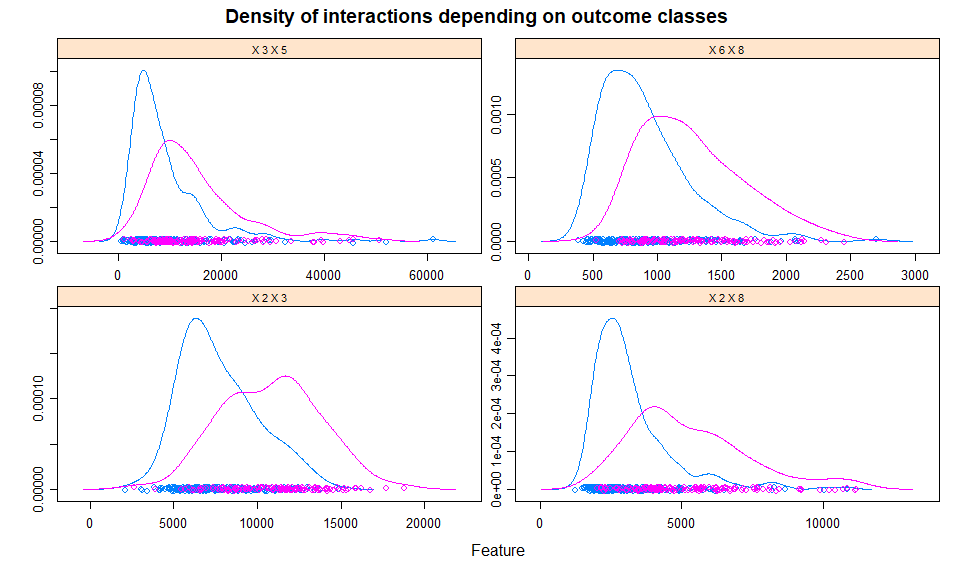

In [8]:
display_png(file="./Plots/interactions_1.png")  

> For these interactions, a clear shift in distribution mean is observed, indicating a relationship between interaction and outcome. <br>
The following plot shows exemplary not chosen interactions: 

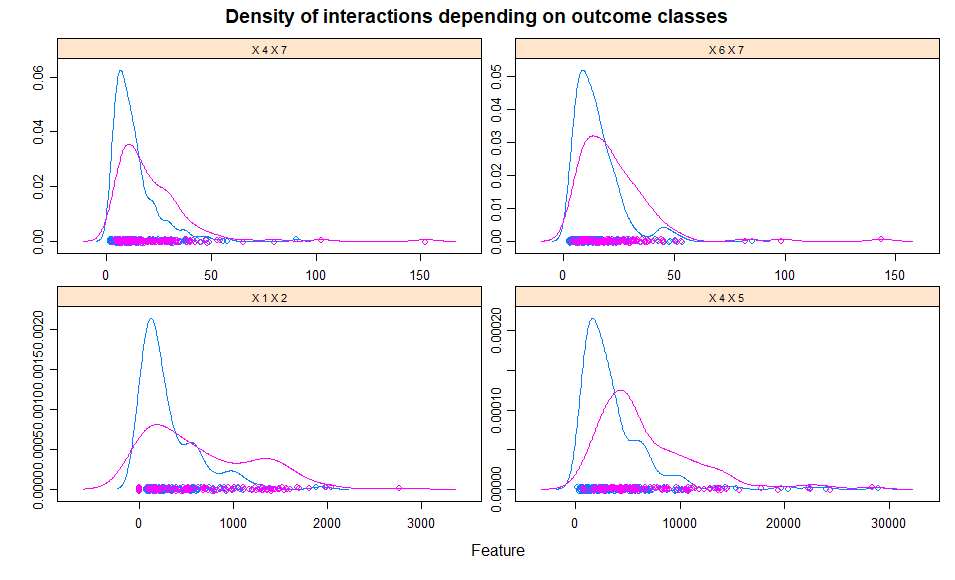

In [9]:
display_png(file="./Plots/interactions_2.png")  

These interaction terms do not have a clear distinction in their respective outcome class specific distribution, or a low correlation.<br> 
To choose the second-order interaction terms, the same procedure is used.<br>

The next decision to make is how to quantify the impact of predictors on the outcome. 
A variation of a latent variable model is considered, inspired by Hansen (2020), even though not entirely equivalent. 4 first-order and 4 second-order interaction terms are included
$$Y_i^* = \sum_{j = 1}^{8} (X_{j i} \beta_j) + B_i + C_i + \epsilon_i $$<br>
$$ B_i = X_{1 i} X_{3 i} \beta_{1 3}+ X_{2 i} X_{8 i } \beta_{2 8}+ X_{6 i} X_{8 i} \beta_{6 8}+ X_{3 i} X_{5 i} \beta_{3 5}$$<br>
$$C_i = X_{2 i} X_{4 i} X_{8 i} \beta_{2 4 8} + X_{2 i} X_{3 i} X_{8 i} \beta_{2 3 8}+ X_{2 i} X_{6 i} X_{8 i} \beta_{2 6 8}+ X_{3 i} X_{4 i} X_{6 i} \beta_{3 4 6}$$
<br>
The beta values for the non-interaction predictors are, in an equivalent fashion to classic OLS, defined by <br><br>
$$\beta_j= \frac{Corr(x_j, y) \text{ }S}  {\sigma_{x{_j}}\text{ }Sc}$$
<br>
, where $S=10$ and $Sc = 10$ are a chosen factors and $\sigma_{x{_j}}$ is the standard deviation of the empirical counterpart in the dataset.<br> 
For the interactions, betas are computed by<br><br>
$$\beta_{int}= \frac{Corr(int, y) *S}  {\sigma_{int}}$$
<br><br>
The variable $int$ can consist of two variables $X_i X_j$ or three variables $X_i X_j X_k$.
Since the outcome is binary, I map the values of $Y$, based on a threshold $F$. The threshold is determined by the relative frequencies of diabetes occuring in the dataset. <br>
$$
            Y_i(Y_i^*)=\left\{\begin{array}{ll} Yes, & y_i > F \\
                     No, & y_i \le F\end{array}\right.
$$    
Thresholding this way ensures that the relative frequencies of the outcome variable is identical to the frequencies of diabetes cases in the dataset.

### Performance of the different methods in the baseline case
#### Preview 
The underlying data generating process is in his latent part a linear model with interactions and classification trees are not well suited for linear predictor-outcome relationships.  <br> CART models should have a bias problem rather than a variance problem, therefore I expect the AdaBoost.M1 to outperform random forests. As I include 4 first-order and 4 second-order interactions, the parametrized benchmark should be outperformed as well. The baseline case is repeated 1000 times and the results are averaged. 

#### Performance evaluation
Both random forests and the AdaBoost lead to small gains in performance across metrics, illustrated in the figures below. 
The AdaBoost performs best in terms of f1-score and in terms of accuracy. The random forest algorithm falls behind but improves over the baseline tree methods, with a higher average accuracy, f1-score and a lower variance of these metrics. Pruning, even though improving on accuracy, harms the sensitivity of the tree-based method.
Both methods outperform the logit model, as it fails to capture the interaction terms, leading to a poor sensitivity and therefore f1-score.


>These findings might be caused by the linear structure of the index model. The linear structure of the latent model allows the  the AdaBoost.M1 to improve on the bias. 

| Performance metric| Random forest| AdaBoost.M1  |Unpruned CART|Pruned CART|Logit  |  
| :---              |    :----:    |    :----:    |    :----:   |    :----: | :----:|                                           
| F1-score          |0.599         | 0.611        |0.587        |0.578      |0.503  |  
| Accuracy          |0.779         | 0.785        |0.760        |0.768    |0.788  |  
| Sensitivity       | 0.602        | 0.621        |0.582        |0.584      |0.495  | 
| Specificity       | 0.866        | 0.867        |0.850        |0.859      |0.934  | 

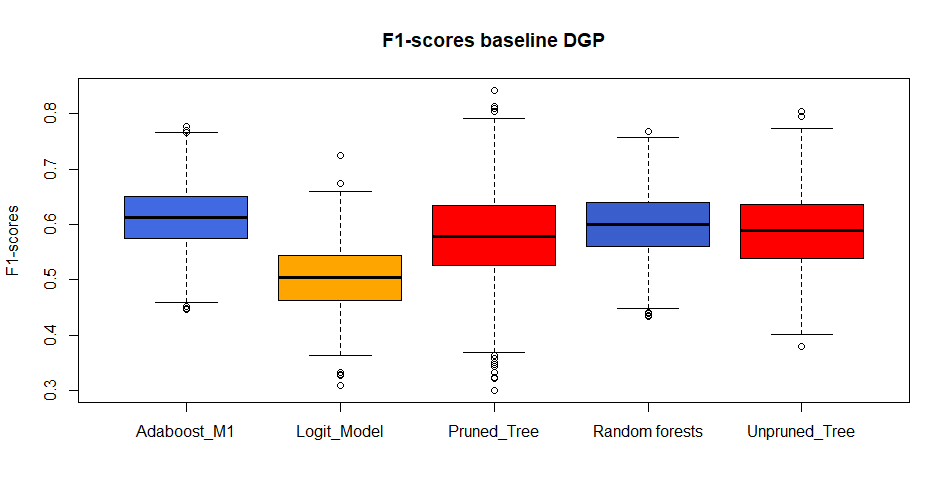

In [11]:
display_png(file="./Plots/F_1_Score_BL.png")

---
## 4. Simulations
---

### Robustness to misclassification of the training dataset

The inspiration for this simulation part stems from one particular part in Breiman's (2001) paper about random forests, where he states that random forests are fairly robust to noise. <br> For the AdaBoost.M1 my expectations are ambiguous. I expect the AdaBoost to lose more on accuracy, compared to random forests and the benchmarks, but it could gain in terms of sensitivity.
The boosting algorithm emphasizes the misclassified observations in the training set. There are fewer diabetes cases than non-diabetes cases in the data. Therefore, the training data will be biased toward the diabetes-positive class. This might lead to improvements in sensitivity and subsequently in f1-score for the AdaBoost.
I expect the random forest algorithm to reduce the number of random features considered at each node to reduce the overall variance of the ensemble if the misclassification rate is too large. <br>

#### Misclassification of the training set: Procedure
This part builds on the previously explained data-generating process. For the training data, on top of the variance from the error term, an artificial misclassification rate is added which starts at $5\%$ and ranges up to $20\%$ of all observations. The test set is not altered. The simulation is done for the following misclassification vector, keeping all other data-generating parameters constant. This misclassification setup can be seen as a bias in the training data towards the less frequent class, in this case, "Yes". This leads to a biased out-of-bag error term, which is not consistent with the misclassification rate on the test dataset.

$$\begin{equation}
        \eta = \begin{bmatrix} 0.05 & 0.1 & 0.15 & 0.2 \end{bmatrix}
    \end{equation}$$
The performance of each method on each misclassification value is tested 250 times and the results are averaged.
    
#### Results and discussion

The figures below show the change in f1-scores and accuracy, given the misclassification rate, compared to the baseline case. <br>
TheAdaBoost.M1 holds up remarkably well, contrary to the prediction, especially for higher alteration rates. The initial expectation about the increase in f1-score for the AdaBoost.M1 can be observed in the first figure. The sensitivity increases, due to a shift of the relative shares of the two outcome classes.
For the highest error rate of $20\%$, the f1-score shifts back to the same level as in the benchmark case. <br>
Random forests keep performance stagnant in terms of f1-score but lose on accuracy. 


The random forest algorithm is relatively outperformed across metrics by pruned classification trees, but remains on par with the pruned classification tree algorithm in absolute terms, as stated in the following table.  <br><br>

<center><strong>Performance metrics for a misclassification rate of $20\%$:</strong></center>

| Performance metric| Random forest| AdaBoost.M1  |Unpruned CART|Pruned CART|Logit  |  
| :---              |    :----:    |    :----:    |    :----:   |    :----: | :----:|                                           
| F1-score          |0.596         | 0.626        |0.563        |0.595      |0.424  |  
| Accuracy          |0.743         | 0.771        |0.719        |0.751      |0.749  |  
| Sensitivity       | 0.574        | 0.584        |0.573        |0.565      |0.302  | 
| Specificity       | 0.828        | 0.864        |0.828        |0.843      |0.971  | 


Deep trees incorporate the misclassified observations the most. Methods which use deep trees suffer therefore the most.
Once again, both methods outperform the logit benchmark and unpruned classification trees in relative and in absolute terms. 

 
> One aspect worthy to be emphasized is the way the misclassification affects the performance of the methods: Adaboost.M1 loses some of its specificity while gaining in terms of sensitivity. Random forests lose roughly equal in both categories. 

The method's most important tuning parameters stay stable as well. The number of iterations stays constant for the Adaboost, around 230 trees. The random forest algorithm stays at 7 random features at each stage for all values of misclassification rates which indicates that the trees themselves do not have a high variance.

For my data generating process, I can confirm the result of Breiman (2001) that random forests are robust to this kind of noise, but I can not confirm the statement of the AdaBoost being not robust in this regard. In the application part, this simulation is repeated for the Indian Pima dataset. For linear latent variable models with non-equal frequent outcome classes, the AdaBoost seems to be the most stable algorithm overall.

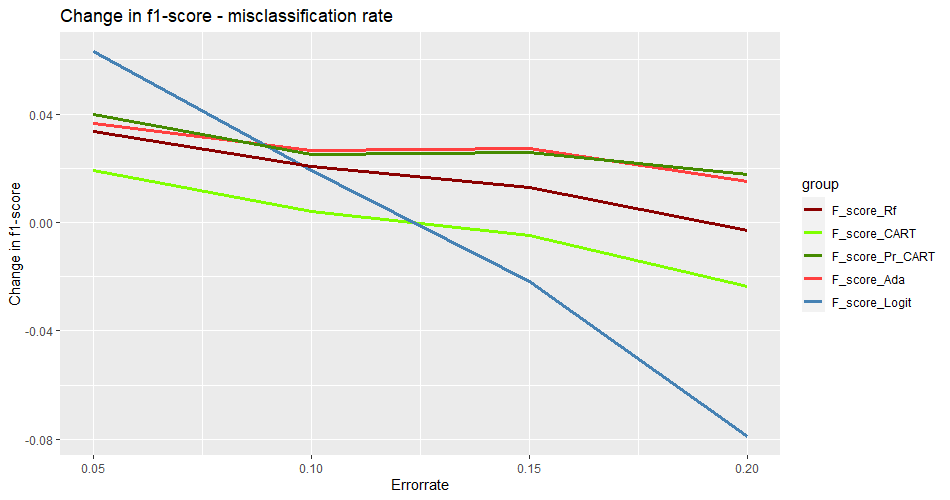

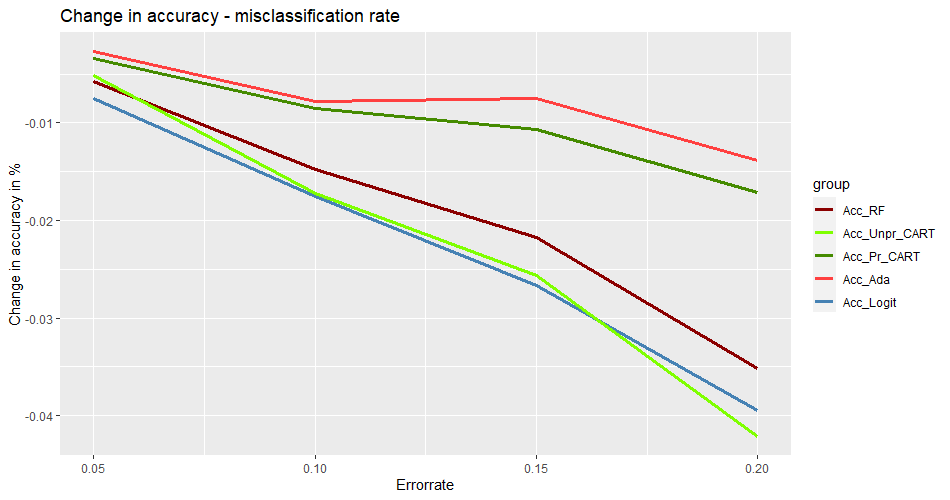

In [12]:
display_png(file="./Plots/Sim1_plot1.png")  
display_png(file="./Plots/Sim1_plot2.png")  


        
### Robustness to truncation on the latent variable

In this part, the latent variable model for the training data is truncated around the cutoff value, the test set remains unaltered. While the relationship between predictor and outcome is the same for training and test set, the training set has less information. 
The predictor-outcome relationship is unchanged, therefore the logit model is theoretically robust with respect to this change. 
The expectations for tree-based methods are ambiguous: Methods that use pruned trees might be outperformed by non-pruned approaches, as they tend to use too little information. 

> One noteworthy aspect is the possible de-bias effect through truncation around the cutoff value throughout the process. The error term is especially relevant around the cutoff value, as it can change the observed class of a given outcome observation. Small truncation percentages might improve the prediction performance of ensemble methods, as it counters the traditional error term.

One given latent $Y^*$-value can be achieved through multiple combinations of predictors. For the observed outcome variable $Y$ the truncation is therefore subtle. The figures below show the truncation in the data: The first figure shows the hidden part of the index model, where a truncation around a certain threshold takes place. In the second figure, the truncation is not observable anymore. 

Instead of thinking of a classical truncation process, one should rather think of a reduction of the information of the training data set around the cutoff value. 

#### Procedure
The alteration of the training set proceeds as follows: <br>
The data points in a certain percentile interval around the cutoff value are prohibited entirely, starting with 5 percent up to 20 \%. The $\theta$-vector shows all truncation values.
$$\theta = \begin{bmatrix} 0.05 & 0.1 & 0.25 & 0.5 \end{bmatrix}$$
The sample size of 500 observations is unchanged for the training set. 
For each truncation value, the process is repeated 100 times and the results are averaged.

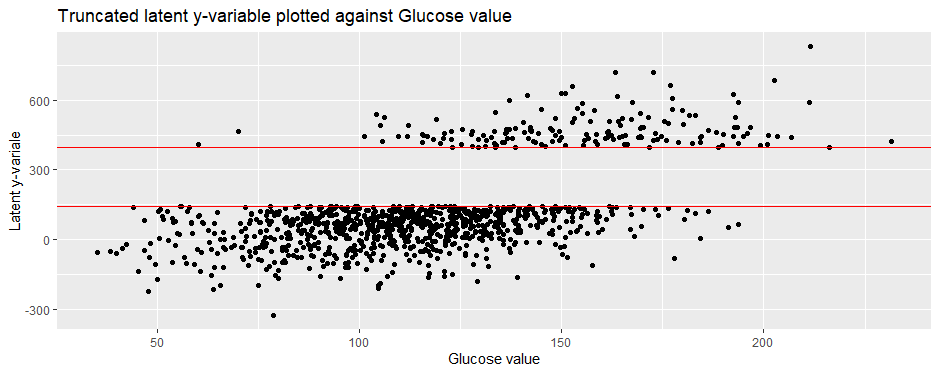

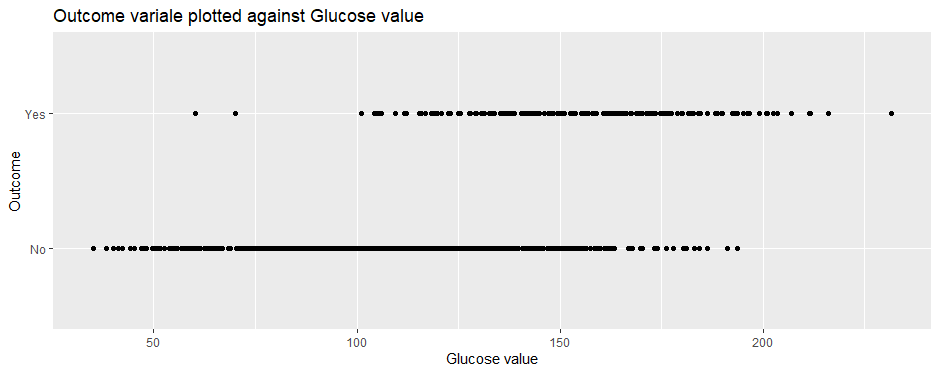

In [13]:
display_png(file="./Plots/truncation_1.png")  
display_png(file="./Plots/truncation_2.png")  

#### Results and discussion of the results
A  first result is that the de-bias effect through small truncation can not be observed for all methods and all metrics. 
For a truncation rate of $5\%$, the accuracy improves for random forests but decreases slightly for the AdaBoost. (illustrated in the second figure below for the accuracy metric)<br>
The sensitivity is mostly unchanged for truncation rates below $20%$, but sharply decreases for truncation rates above $20\%$<br>
Higher truncation widths affect random forests and the AdaBoost similarly. The ensemble methods maintain a constant level of accuracy but lose on the sensitivity value. 
The logit and unpruned benchmarks outperform the ensemble methods in relative terms.
In absolute terms, the AdaBoost approach is on par with the best-performing method for all truncation values but loses its edge over the other methods. <br><br>


<center><strong>Performance metrics for a truncation width of $50\%$:</strong></center>

| Performance metric| Random forest| AdaBoost.M1  |Unpruned CART|Pruned CART|Logit  |  
| :---              |    :----:    |    :----:    |    :----:   |    :----: | :----:|                                           
| Accuracy          |0.782         | 0.783        |0.774        |0.772      |0.783  |  
| Sensitivity       | 0.486        | 0.494        |0.476        |0.467      |0.448  | 
| Specificity       | 0.930        | 0.927        |0.921        |0.924      |0.946  | 

Truncation has the expected effect: While the overall performance can benefit from small truncation around the latent outcome variable, higher shares of truncation harm the sensitivity for all metrics crucially, which is illustrated in the first figure below. 

Deep trees seem to be most robust to low informative training, as they incorporate the most information. As a side note: Parametrised methods seem to be able to handle this type of information alteration. <br><br>

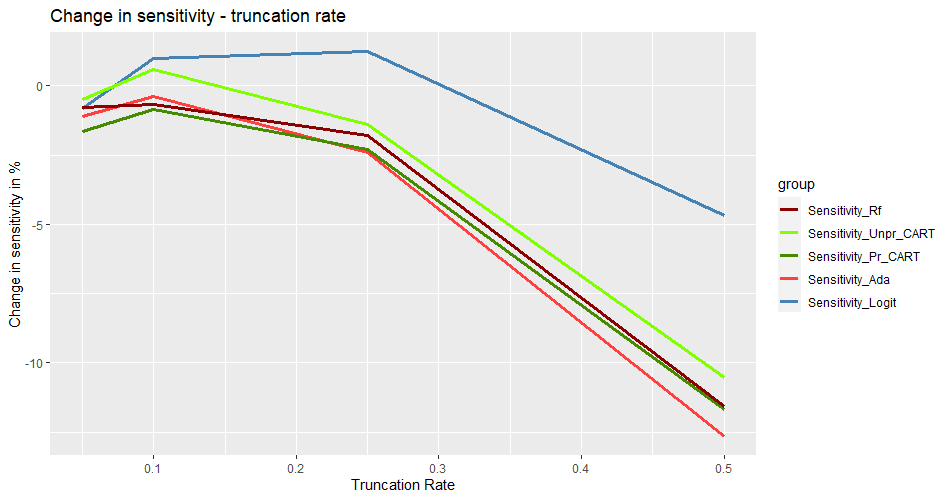

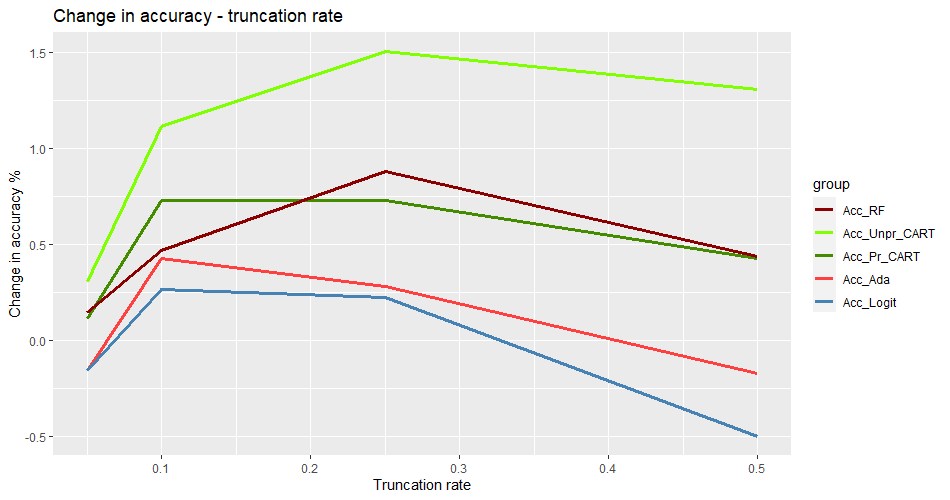

In [14]:
display_png(file="./Plots/sim2_plot1.png")
display_png(file="./Plots/sim2_plot2.png")  

---
## 5. Empirical application
---
#### Pima Indians diabetes database
The dataset is widely used as a reference dataset (Breiman 2001, Pekel & Özcan 2020) for binary classification and consists of 8 predictor variables and 1 outcome variable. Some predictor variables are discrete but most of them are continuous. On top of that, some of them are highly correlated, e.g. the BMI and the triceps skin fold thickness. <br>



| Variable                      | Description                                                  |
| :---                          |    :----:                                                    |
| Pregnancies                   | Number of pregnancies                                        |
| Glucose tolerance test        | Reaction of the body when receiving glucose                     |
| Blood pressure                | Diastolic blood pressure                                     |
| Triceps skin fold thickness   | A method to measure body fat                                 |
| Serum insulin                 | The baseline level of insulin                                |
| BMI                           | Body Mass Index                                              |
| Diabetes pedigree function    | Function which measures the family history of diabetes       |
| Age                           | In years                                                     |

After cleaning the data, 392 unique observations remain in the dataset. <br><br>

#### Performance results
To test the performance of the methods, I create a hold-out sample, serving as test data, which consists of $30\%$ of the observations. Repeating the process 100 times and averaging leads to the following results. <br><br>

Both, the random forest approach and the AdaBoost.M1 algorithm, lead to an improvement in accuracy over the basic tree-based methods, on par with the logit model. The Adaboost.M1 falls short in sensitivity, failing to improve on correctly predicting true diabetes cases. Therefore, it falls short in f1-score 
compared to the tree-based benchmarks. <br> Random forests outperform all other methods in this performance metric as well, even though the gains in f1-score are only by a slim margin. The logit benchmark model fails to capture the interaction and is therefore outperformed by the tree-based methods. <br>

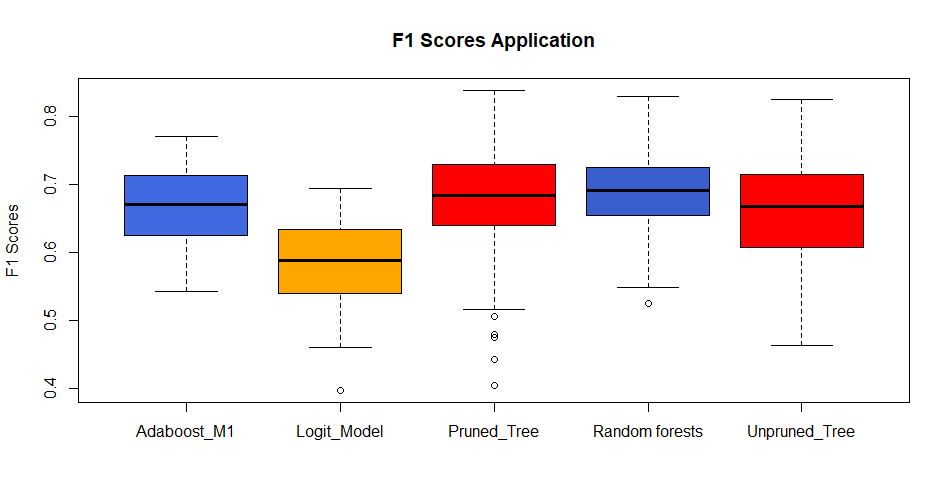

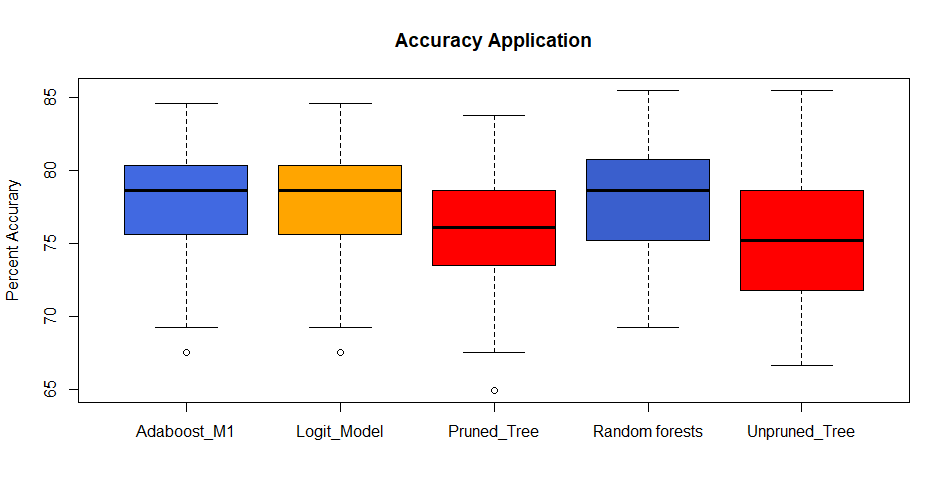

In [15]:
display_png(file="./Plots/FScore_Appl.png")  
display_png(file="./Plots/Accuracy_Appl.png")  



> The goal of the data generating process was to closely resemble the dataset at hand. I attribute the differences in performance to the structural form of the index function. A linear predictor - latent outcome variable might not be best suited to describe the dataset at hand. 

#### Robustness to misclassification of the training dataset for the Pima Indian dataset

The simulation about misclassification of the training set is repeated for the Pima Indian dataset. Once again, a hold-out sample consisting of $30\%$ of the observations is created and the methods are trained on the remaining dataset. An increasingly high share of observations is misclassified on the training dataset.<br><br> The statement from Breiman that random forests are more robust to misclassification of the training data can not be verified. The figure below indicates that the AdaBoost is more robust to missclassification of the training data than random forests and the other benchmark methods. This counterintuitive finding could be caused by two aspects: The data cleaning process used in this simulation is much more strict. Breiman did not delete any observations. For this work, a big part of the dataset was not considered. The second aspect is a difference in share of the hold-out set. These differences might influence the relative performance of the AdaBoost, compared to the random forest approach.   

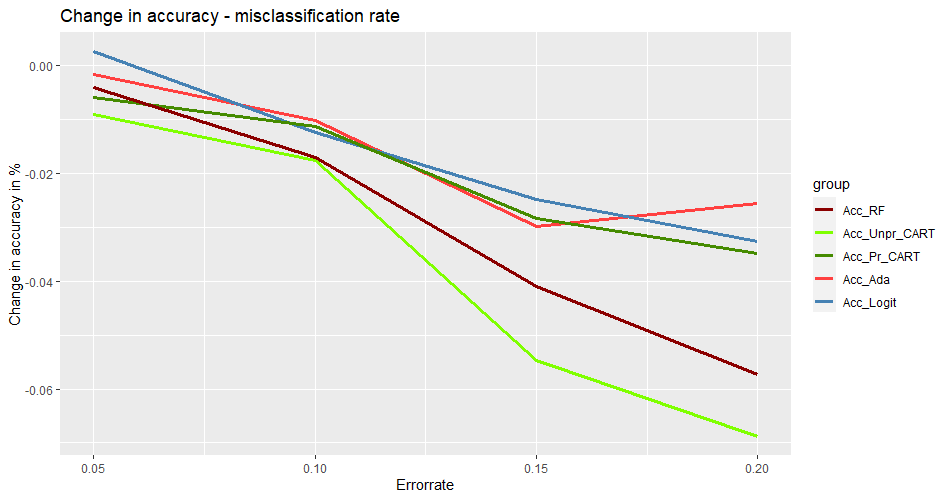

In [17]:
display_png(file="./Plots/Application_sim_plot_1.png")  

---
## 6. References
---

<strong>Biau, Gérard, and Erwan Scornet.</strong> <a href="https://arxiv.org/pdf/1511.05741.pdf">A random forest guided tour."</a> Test 25.2 (2016): 197-227. <br><br>
<strong>Clifton D Sutton.</strong> <a href="https://mason.gmu.edu/~csutton/vt6.pdf">Classification and regression trees, bagging, and boosting. Handbook of statistics</a>, 24:303–
329, 2005.<br><br>
<strong> Díaz-Uriarte, Ramón, and Sara Alvarez de Andrés.</strong> <a href ="https://link.springer.com/article/10.1186/1471-2105-7-3">"Gene selection and classification of microarray data using random forest."</a> BMC bioinformatics 7.1 (2006): 1-13.<br><br>
<strong>Dietterich, Thomas G. </strong> <a href ="http://nozdr.ru/data/media/biblio/kolxoz/Cs/CsLn/M/Multiple%20Classifier%20Systems,%201%20conf.,%20MCS%202000(LNCS1857,%20Springer,%202000)(ISBN%203540677046)(411s)_CsLn_.pdf#page=8" >"Ensemble methods in machine learning."</a> International workshop on multiple classifier systems. Springer, Berlin, Heidelberg, 2000. <br><br>
<strong>Ebru Pekel  ̈Ozmen and Tuncay  ̈Ozcan.</strong> <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1002/for.2652">Diagnosis of diabetes mellitus using artificial neural network and
classification and regression tree optimized with genetic algorithm. </a>Journal of Forecasting, 39(4):661–670,
2020.<br><br>
<strong>Fleet Hertzmann and Brubaker.</strong> <a href="https://www.cs.toronto.edu/~mbrubake/teaching/C11/Handouts/AdaBoost.pdf">Adaboost lecture</a> csc411. 2015.<br><br>
<strong>Hansen, B.</strong> "Econometrics. Online textbook." (2020): 54.<br><br>
<strong>Ho, Tin Kam. </strong><a href = "https://link.springer.com/content/pdf/10.1007/BFb0033288.pdf" >Nearest neighbors in random subspaces.</a> Joint IAPR international workshops on statistical techniques in pattern recognition (SPR) and structural and syntactic pattern recognition (SSPR). Springer, Berlin, Heidelberg, 1998.<br><br>
<strong>Laurent, Hyafil, and Ronald L. Rivest. </strong><a href = "https://people.csail.mit.edu/rivest/HyafilRivest-ConstructingOptimalBinaryDecisionTreesIsNPComplete.pdf" >"Constructing optimal binary decision trees is NP-complete."</a> Information processing letters 5.1 (1976): 15-17.<br><br>
<strong>Leo Breiman.</strong><a href="https://link.springer.com/content/pdf/10.1023/A:1010933404324.pdf" >Random forests.</a> Machine learning, 45(1):5–32, 2001. <br><br>
<strong>Lin, Yi, and Yongho Jeon.</strong> <a href="https://www.tandfonline.com/doi/abs/10.1198/016214505000001230?journalCode=uasa20">"Random forests and adaptive nearest neighbors."</a> Journal of the American Statistical Association 101.474 (2006): 578-590.
<strong>Yoav Freund and Robert E Schapire. </strong><a href="https://dl.acm.org/doi/pdf/10.1145/238061.238163" >Game theory, on-line prediction and boosting.</a> In Proceedings of the
ninth annual conference on Computational learning theory, pages 325–332, 1996.<br><br>
<strong>Robert E Schapire.</strong> <a href ="https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.448.3000&rep=rep1&type=pdf">The boosting approach to machine learning: An overview. Nonlinear estimation and
classification, pages</a> 149–171, 2003.<br><br>
<strong>Trevor Hastie, Robert Tibshirani, Jerome H Friedman, and Jerome H Friedman.</strong> <a href="https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.158.8831&rep=rep1&type=pdf">The elements of statistical
learning: data mining, inference, and prediction</a>, volume 2. Springer, 2009.<br><br>










